In [1]:
import pandas as pd
import mglearn
import random
import numpy as np

# Train-Test Split Function
The `train_test_split` function is responsible for splitting the dataset into training and test sets.

- $X$: Input features (matrix).
- $y$: Target values (vector).
- $test\_size$: Proportion of the dataset to include in the test split.
- $random\_state$: Seed for the random number generator, ensuring reproducibility.

In [2]:
def train_test_split(X, y, test_size=0.25, random_state=None):
    
    # Set random seed for reproducibility if random_state is provided
    if random_state is not None:
        np.random.seed(random_state)
        
        
    # Get the total number of samples
    n_samples = len(X)
    
    
    # Create an array of indices and shuffle them
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    # Determine the number of samples for the test set
    if type(test_size) == float:
        test_size = int(test_size * n_samples)
        
        
    # Extract indices for the test and training sets
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    
    
    # Use indices to split the data into training and testing sets
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

# Linear Regression Functions


## Coefficient calculation formula
The coefficients for linear regression are obtained using the normal equation:
$$
\text{coefficients} = (X_{\text{ext}}^T X_{\text{ext}})^{-1} X_{\text{ext}}^T y
$$

## Linear Regression Prediction formula
The prediction for linear regression is given by:
$$
y_{\text{pred}} = X_{\text{ext}} \cdot \text{coefficients}
$$


## Fitting Linear Regression
The `fit_linear_regression` function calculates the coefficients for linear regression using the normal equation.

- $X$: Input features.
- $y$: Target values.
- $X_{\text{ext}}$: Extended feature matrix with an added column of ones for the intercept term.
- $\text{coefficients}$: Coefficients for the intercept and features.

## Prediction
The `predict` function predicts target values based on input features and coefficients.

- $X$: Input features.
- $X_{\text{ext}}$: Extended feature matrix.
- $\text{coefficients}$: Coefficients obtained from linear regression.
- $y_{\text{pred}}$: Predicted target values.

## Mean Squared Error (MSE) formula
The Mean Squared Error (MSE) is calculated as follows:
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true},i} - y_{\text{pred},i})^2
$$



## Mean Squared Error Calculation
The `mean_squared_error` function calculates the mean squared error between true and predicted values.

- $y_{\text{true}}$: True target values.
- $y_{\text{pred}}$: Predicted target values.
- $\text{mse}$: Mean squared error.

In [3]:
def fit_linear_regression(X, y):
    
    # Add a column of ones to X for the intercept term
    X_ext = np.column_stack((np.ones(len(X)), X))
    
    # Calculate coefficients using the normal equation
    coefficients = np.dot(np.dot(np.linalg.pinv(np.dot(X_ext.T, X_ext)), X_ext.T), y)
    
    return coefficients

def predict(X, coefficients):
    
    
    # Add a column of ones to X for the intercept term
    X_ext = np.column_stack((np.ones(len(X)), X))
    
    # Calculate predicted target values using dot product
    y_pred = np.dot(X_ext, coefficients)
    
    return y_pred
    



In [4]:

def mean_squared_error(y_true, y_pred):
    
    
    # Ensure that the input arrays have the same length
    if len(y_true) != len(y_pred):
        raise ValueError("Input arrays must have the same length.")

    # Calculate squared differences
    squared_diff = []
    for i in range(len(y_pred)):
        squared_diff.append((y_true[i] - y_pred[i]) ** 2)

    # Calculate mean squared error
    mse = sum(squared_diff) / len(y_true)

    return mse


In [5]:
# Load the extended Boston Housing dataset
X, y = mglearn.datasets.load_extended_boston()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Fit the linear regression model on the training set
coefficients = fit_linear_regression(X_train, y_train)

# Make predictions on the training set
y_train_pred = predict(X_train, coefficients)

# Make predictions on the test set
y_pred = predict(X_test, coefficients)


# Calculate Mean Squared Error (MSE) on the test set
mse_test = mean_squared_error(y_test, y_pred)


# Calculate Mean Squared Error (MSE) on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error on Training Set:", mse_train)
print("Mean Squared Error on Test Set:", mse_test) 

Mean Squared Error on Training Set: 5.119969179921958
Mean Squared Error on Test Set: 14.329434192452062


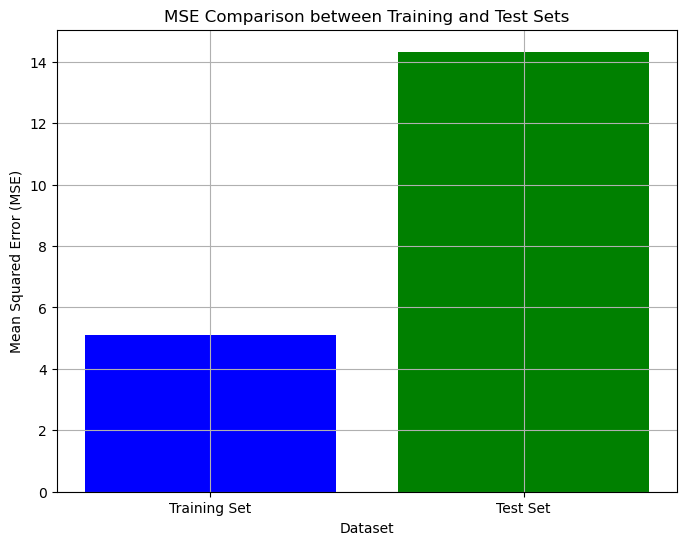

In [6]:
import matplotlib.pyplot as plt

# Calculate Mean Squared Error (MSE) for training and test sets
mse_values = [mse_train, mse_test]
set_labels = ['Training Set', 'Test Set']

# Create a bar plot to compare MSE values
plt.figure(figsize=(8, 6))
plt.bar(set_labels, mse_values, color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison between Training and Test Sets')
plt.grid(True)
plt.show()


## Ridge Regression

Ridge regression, also known as Tikhonov regularization or L2 regularization, takes the least squares function and adds a regularization term to it. This is typically used to prevent overfitting.

The ridge regression function is given by:

$$
\text{J(θ)} = MSE(θ) + α\sum_{i=1}^{n} (θ_i)^2 
$$

Where:
- $\text{J(θ)}$ is the cost function to be minimized.
- $MSE(θ)$ is the Mean Squared Error term.
- $α$ is the regularization parameter.
- $θ_i$ are the regression coefficients.

The ridge regression coefficients are obtained by minimizing this cost function:

$$
\hat{θ} = \text{argmin}_θ J(θ)
$$

The closed-form solution for ridge regression is given by:

$$
\hat{θ} = (X^T X + αI)^{-1} X^T y
$$

Here:
- $\hat{θ}$ is the vector of ridge regression coefficients.
- $X$ is the matrix of input features.
- $y$ is the vector of target values.
- $I$ is the identity matrix.

In [7]:
import numpy as np

# closed-form approach
def RidgeRegression(X, Y, alpha):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    I = np.identity(X_b.shape[1])
    I[0, 0] = 0
    
    theta = np.linalg.inv(X_b.T.dot(X_b) + alpha * I).dot(X_b.T).dot(Y)
    
    # Separate bias and weights
    w = theta[1:]
    b = theta[0]

    return w, b

Iterative methods like gradient descent are also used for ridge regression.

The cost function can also be written as:

$$
\text{J(θ)} = \frac{1}{2m}(\sum_{i=1}^{m} (h_θ(x^{(i)})-y^{(i)})^2 + α\sum_{j=1}^{n}(θ_j)^2)
$$

with the derivative with respect to $w_j$ (weights) when $θ_j$, $j \ge 1$:

$$
\frac{\partial J(θ)}{\partial w_j} = \frac{1}{m}(\sum_{i=1}^{m} (h_θ(x^{(i)})-y^{(i)})\cdot x_j^{(i)} + α\cdot w_j)
$$

with the derivative with respect to $b$ (bias) when $θ_0$:

$$
\frac{\partial J(θ)}{\partial b} = \frac{1}{m}\sum_{i=1}^{m} (h_θ(x^{(i)})-y^{(i)})
$$

Where:
- $m$ is the number of training examples.
- $h_θ(x^{(i)})$ is the predicted value of the $i$-th example.
- $y^{(i)}$ is the actual value of the $i$-th example.
- $θ_j$ are the regression coefficients.
- $n$ is the number of input features.
- $α$ is the regularization parameter.

In [8]:
# gradient descent approach
def gdRR(X, y, alpha, lr, n_iterations):
    m, n = X.shape
    W = np.zeros(n)
    b = 0
    
    for i in range(n_iterations):
        pred = np.dot(X, W) + b
        diff = pred - y
        dJdW = (1/m) * np.dot(X.T, diff) + alpha * W
        dJdb = (1/m) * np.sum(diff)
        
        W -= lr * dJdW
        b -= lr * dJdb
    
    return W, b

In [9]:
test_alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

results = []
w_set = []
b_set = []

for alpha in test_alphas:
  w, b = RidgeRegression(X_train, y_train, alpha)
  Y_pred = np.dot(X_test, w) + b

  results.append(mean_squared_error(y_test, Y_pred))
  w_set.append(w)
  b_set.append(b)

w_set = [w[0] for w in w_set]

results_gd = []

for alpha in test_alphas:
    w1, b1 = gdRR(X_train, y_train, alpha, lr = 0.01, n_iterations = 100)
    Y_pred = np.dot(X_test, w1) + b1
    results_gd.append(mean_squared_error(y_test, Y_pred))

print(results_gd)

data = {"Alpha": test_alphas, "w": w_set, "b": b_set, "MSE": results}
df = pd.DataFrame(data)
display(df)

[60.60144060315256, 60.67839785420658, 61.50384459946837, 72.37612588307135, 116.77088424301623, 124.3714659334745, 1.2713103417502642e+190]


Alpha         w          b        MSE
0     0.001  5.288569 -25.050419  13.519711
1     0.010 -5.665918 -14.889592  12.257621
2     0.100 -3.472767   6.438892  11.013404
3     1.000 -1.493739  19.766685  12.710819
4    10.000 -0.856798  23.426068  20.179910
5   100.000 -0.293358  25.241065  33.025438
6  1000.000 -0.086045  24.776840  53.970180

From the above table, it can be seen that the lowest MSE for this dataset is when α = 0.1, which is our optimal regularization.

The ridge regression function can be found from sklearn.linear_model.

In [10]:
from sklearn.linear_model import Ridge

for alpha in test_alphas:
    ridge_model = Ridge(alpha=alpha)

    # Train the model
    ridge_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = ridge_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

Mean Squared Error: 13.519710896804316
Mean Squared Error: 12.25762120221095
Mean Squared Error: 11.01340443725933
Mean Squared Error: 12.710819494074418
Mean Squared Error: 20.17990981392929
Mean Squared Error: 33.02543777154453
Mean Squared Error: 53.970179940917824


As you can see, the MSE of the different alpha levels match.

## LASSO Regression

LASSO stands for Least Absolute Shrinkage and Selection Operator, is a linear regression technique with added regularization. It combines the simplicity of linear regression with the regularization power of the L1 norm to prevent overfitting and perform feature selection.

The cost function of LASSO regression is given by:

$$
J(\theta) = MSE(\theta) + α\sum_{i=1}^{n} |\theta_i|
$$

Where:
- $\text{J(θ)}$ is the cost function to be minimized.
- $MSE(θ)$ is the Mean Squared Error term.
- $α$ is the regularization parameter.
- $θ_i$ are the regression coefficients.

The LASSO regression coefficients are obtained by minimizing this cost function:

$$
\hat{\theta} = \text{argmin}_\theta J(\theta)
$$

There is no general closed-form solution for LASSO regression but is commonly minimized through gradient descent.

Our cost function can also be written as:

$$
J(\hat{\theta})=\frac{1}{2m} \big|\big| Y-\hat{\theta}X \big|\big| + \alpha∑_{i=1}^{n} \hat{|\theta_i|}
$$

We are looking to minimize the cost fuction with respect to W and b
Where $\hat{\theta} = \begin{bmatrix}  b & {\hat{\theta_1}} &.&.&.& {\hat{\theta_n}} \end{bmatrix}$
and $W = \begin{bmatrix} \hat{\theta}_1 &.&.&.& \hat{\theta_n} \end{bmatrix}$

so $\frac{d}{dW}J(\hat{\theta}) = \frac{1}{m}X^T(Y-\hat{\theta}X) + \alpha sgn(W)$

and $\frac{d}{db}J(\hat{\theta}) = \frac{1}{m}(Y-\hat{\theta}X)$

Then using the gradient descent:
$$
\theta_{k+1}=\theta_{k}-h \nabla J\left(\theta_{k}\right)
$$

Where $\theta_{k}$ is our initial guess and $\theta_{k+1}$ is our new guess and $h$ is our step size

In [11]:
def lasso_regression(X, y, alpha, num_iterations, learning_rate):

    # Get m the number of observations and n the number of independent variables
    m, n = X.shape

    # Initialize weights
    W = np.zeros(n)

    # Initialize intercept term
    b = 0

    # Performing gradient descent to find the minimum of out cost function
    for iteration in range(num_iterations):
        predictions = np.dot(X, W) + b
        residuals = predictions - y
        dJdW = (1/m)*np.dot(X.T, residuals) + alpha * np.sign(W)
        dJdb = (1/m)*np.sum(residuals)

        W -= learning_rate * dJdW
        b -= learning_rate * dJdb

    return W, b


In [12]:
las_results = []

for alpha in test_alphas:
  w, b = lasso_regression(X_train, y_train, alpha,num_iterations = 100000, learning_rate = 0.05)
  Y_pred = np.dot(X_test, w) + b

  las_results.append(mean_squared_error(y_test, Y_pred))

print(las_results)


[11.357483029837827, 12.370242247366956, 22.463406393328086, 54.92725786833492, 67.1032788247271, 135.22114084965105, 518498.2318359897]


In [13]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

for alpha in test_alphas:
    lasso_model = Lasso(alpha=alpha,max_iter = 100000)

    # Train the model
    lasso_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lasso_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

Mean Squared Error: 11.413035283804978
Mean Squared Error: 12.901685764529898
Mean Squared Error: 22.456548850036334
Mean Squared Error: 55.313519821949356
Mean Squared Error: 75.76013971789499
Mean Squared Error: 75.76013971789499
Mean Squared Error: 75.76013971789499


We can see that up to alpha = 10 the MSE of our gradient descent is approximately equal to the sklearn LASSO MSE. This will differ by changing up the number of iterations and learning rate.

Also alpha = 0.001 or 0.01 seems to minimize the MS

In [14]:
w, b = lasso_regression(X_train, y_train, alpha=0.01,num_iterations = 200000, learning_rate = 0.2)

print(w)
print(b)


[-1.05065185e-03 -1.30786474e-04  1.33800659e-03  2.89429150e-03
  2.73764867e-03  8.84182765e-03 -1.54815999e-03 -8.63094201e+00
  1.32791234e+01  9.55667847e-03  2.14979186e-03  4.19764849e+00
 -6.85762349e+00 -4.63692482e-04 -1.86216142e-04 -9.35529136e-04
 -6.00485784e-04 -1.05654121e-03  1.46659907e-03 -2.51719760e-03
 -1.81941515e-03 -8.09130848e+00 -3.15661566e-03 -8.94036386e-04
 -3.45122570e-03 -2.22740287e-04  1.80581780e+00 -1.62805211e-03
  1.03268103e-03 -1.80140876e-03  3.51369019e-03  3.16503774e-04
  1.91503091e-04 -1.07491103e-03  7.81459824e-04  1.44159791e-03
  1.16219890e-03 -1.56990382e-03  2.18878756e-02  1.67475186e-03
  2.21389775e-03  1.32967725e-03  7.09162498e-03 -7.95280675e-01
  6.03134171e-03  7.83502016e+00 -3.75918116e-03  6.89980854e-03
 -3.76016918e-05  2.89429150e-03 -6.48213890e+00 -2.22383922e+00
  1.43351372e-03  1.12349763e-03  6.97753137e-04  9.61843749e+00
  1.05470690e-04  2.20876328e+00  2.29266121e-04 -2.48713144e+00
 -3.09323558e+00 -1.59183

In [15]:
# Get ride of small values close to 0
for i in range(len(w)):
    if(abs(w[i]) < 0.01):
        w[i] = 0

print(w)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -8.63094201e+00
  1.32791234e+01  0.00000000e+00  0.00000000e+00  4.19764849e+00
 -6.85762349e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -8.09130848e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.80581780e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.18878756e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.95280675e-01
  0.00000000e+00  7.83502016e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -6.48213890e+00 -2.22383922e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  9.61843749e+00
  0.00000000e+00  2.20876328e+00  0.00000000e+00 -2.48713144e+00
 -3.09323558e+00  0.00000

In [16]:
# Create a Lasso regression model
lasso_model = Lasso(alpha=0.01,max_iter = 1000000)
# Fit the model to the training data
lasso_model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

print(lasso_model.coef_)
print(lasso_model.intercept_)

[-0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -8.61448752e+00
  1.32747817e+01  0.00000000e+00 -0.00000000e+00  4.22948747e+00
 -6.79244783e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -8.10113946e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.80657247e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  7.84771010e-03  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -8.13870499e-01
  0.00000000e+00  7.87205046e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -6.47720077e+00 -2.21214790e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  9.61987786e+00
  0.00000000e+00  2.20457393e+00 -0.00000000e+00 -2.49419166e+00
 -3.13735059e+00 -0.00000

If we compare the coefficients of sklearn LASSO to the gradient descent, the gradient descent has almost the same values as the sklearn one

But notice that we had to change the number of iterations and learning rate to find a close approximate to the sklearn model

In [17]:
Y_pred_test = np.dot(X_test, w) + b
print(mean_squared_error(y_test, Y_pred_test))


12.890890065621827


In [18]:
Y_pred_train = np.dot(X_train, w) + b
print(mean_squared_error(y_train, Y_pred_train))

10.5147286211851


The MSE now for our LASSO function is 12.295366661959434 now further from the SKlearn MSE of 12.901685764529885 but the coeffcients are now closer.

Our training data MSE and test MSE now seem to be much closer.

